In [2]:
import os
import numpy as np
import cv2
import matplotlib. pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [3]:

dir = r"C:\Users\Admin\Desktop\prodigy\prodigy_task - 3\PetImages"
categories= ['Cat', 'Dog']
data = []
for category in categories:
    path = os. path.join(dir, category)
    label= categories.index(category)
    for img in os.listdir(path):
        imgpath = os. path.join(path, img)
        pet_img=cv2.imread (imgpath,0)
        try:
            pet_img=cv2.resize(pet_img, (50,50))
            image = np. array(pet_img).flatten()
            data.append([image, label])
        except Exception as e:
            pass
        
print(len(data))


24913


In [4]:

pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()



In [5]:
pick_in =  open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()
random.shuffle (data)
features = [] 
labels = []
for feature,label in data:
    features.append(feature)
    labels.append(label)
xtrain, xtest, ytrain,ytest = train_test_split (features, labels, test_size= 0.01)
#model = SVC(C=1, kernel='poly',gamma= 'auto')
#model.fit(xtrain, ytrain)
pick = open('model.sav', 'rb')
model= pickle.load(pick)
pick.close()

Accuracy:  0.592
Prediction is :  Cat


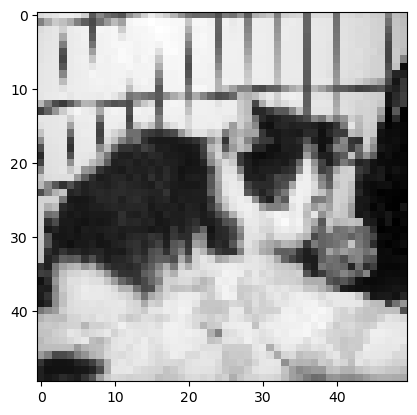

In [6]:
prediction= model.predict(xtest)
accuracy = model.score(xtest,ytest)
categories = ['Cat', 'Dog']
print('Accuracy: ', accuracy)
print('Prediction is : ', categories [prediction [0] ])
my_pet = xtest [0].reshape(50,50)
plt.imshow (my_pet,cmap='gray')
plt.show()